In [139]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob

In [8]:
plots = "/Users/benplatten/workspace/UvA_Thesis/FINAL_REPORT/plots/results/"

In [53]:
sns.set_context("paper")

In [ ]:
# save viz template
title=
name=
sns.set_context("paper")

plot = ## .set_title(title)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

In [2]:
from more_itertools import unique_everseen
from collections import Counter


def make_nice_string(s):
    N= s.split('-')
    NU= list(unique_everseen(N))
    NC= Counter(N)
    NN = [p+'-'+str(NC[p]) for p in NU if p !='']
    return ' '.join(NN)

## Main results table 

In [9]:
# model: reward function training
#rows = problem sets
# cols = average reward, % acceptable 

In [284]:
data = pd.read_csv("test_data/test_data.csv")

set_sort = ['shifts_easy_ratio_mixed', 
            'shifts_easy_ratio_above', 
            'shifts_medium_ratio_mixed', 
            'shifts_medium_ratio_above',
            'shifts_hard_ratio_mixed', 
            'shifts_hard_ratio_above',
            'shifts_extrahard_ratio_mixed', 
            'shifts_extrahard_ratio_above', 
            'shifts_xxhard_ratio_mixed',
            'shifts_xxhard_ratio_above']

old_set_dict = {'shifts_easy_ratio_mixed':'Max shifts 8, average shift-emp ratio', 
            'shifts_easy_ratio_above':'Max shifts 8, high shift-emp ratio', 
            'shifts_medium_ratio_mixed':'Max shifts 14, average shift-emp ratio', 
            'shifts_medium_ratio_above':'Max shifts 14, high shift-emp ratio',
            'shifts_hard_ratio_mixed':'Max shifts 18, average shift-emp ratio', 
            'shifts_hard_ratio_above':'Max shifts 18, high shift-emp ratio',
            'shifts_extrahard_ratio_mixed':'Max shifts 23, average shift-emp ratio', 
            'shifts_extrahard_ratio_above':'Max shifts 23, high shift-emp ratio', 
            'shifts_xxhard_ratio_mixed':'Shifts 30, average shift-emp ratio',
            'shifts_xxhard_ratio_above':'Shifts 30, high shift-emp ratio'}

set_dict = {'shifts_easy_ratio_mixed':'3-8_1.2-2.8', 
            'shifts_easy_ratio_above':'3-8_2.9-5', 
            'shifts_medium_ratio_mixed':'9-14_1.2-2.8', 
            'shifts_medium_ratio_above':'9-14_2.9-5',
            'shifts_hard_ratio_mixed':'15-18_1.2-2.8', 
            'shifts_hard_ratio_above':'15-18_2.9-5',
            'shifts_extrahard_ratio_mixed':'19-23_1.2-2.8', 
            'shifts_extrahard_ratio_above':'19-23_2.9-5', 
            'shifts_xxhard_ratio_mixed':'24-30_1.2-2.8',
            'shifts_xxhard_ratio_above':'24-30_2.9-5'}

set_index = {'3-8_1.2-2.8':1, 
            '3-8_2.9-5':2, 
            '9-14_1.2-2.8':3, 
            '9-14_2.9-5':4,
            '15-18_1.2-2.8':5, 
            '15-18_2.9-5':6,
            '19-23_1.2-2.8':7, 
            '19-23_2.9-5':8, 
            '24-30_1.2-2.8':9,
            '24-30_2.9-5':10}

old_set_index = {'Max shifts 8, average shift-emp ratio':1, 
            'Max shifts 8, high shift-emp ratio':2, 
            'Max shifts 14, average shift-emp ratio':3, 
            'Max shifts 14, high shift-emp ratio':4,
            'Max shifts 18, average shift-emp ratio':5, 
            'Max shifts 18, high shift-emp ratio':6,
            'Max shifts 23, average shift-emp ratio':7, 
            'Max shifts 23, high shift-emp ratio':8, 
            'Max shifts 30, average shift-emp ratio':8,
            'Max shifts 30, high shift-emp ratio':10}

mod_dict = {'random_0':'Random agent',
            'step_8':'Step, train size 3-8',
            'stepbonus_8':'Step Bonus, train size 3-8',
            'terminal_8':'Terminal, train size 3-8'}

model_index = {'Random agent':1,
            'Step, train size 3-8':2,
            'Terminal, train size 3-8':3,
            'Step Bonus, train size 3-8':4}

data['Training Set'] = data['set'].replace(set_dict)
data['Model'] = data['model'].replace(mod_dict)

data['set_index'] = data['Training Set'].replace(set_index)
data['model_index'] = data['Model'].replace(model_index)

data['Average Reward'] = data.reward

data['acceptable']= [1 if i == 1 else 0 for i in data['reward'].round(6)]


In [264]:
table = data[['Model','Training Set','Average Reward','acceptable','set_index','model_index']].groupby(['Model','Training Set']).agg({'Average Reward': 'mean',
                                                                                               'acceptable':['sum','count'],
                                                                                               'set_index':'first',
                                                                                               'model_index':'first'})

#.mean()#.reset_index()

table['Average Reward'] = table['Average Reward'].round(2)
table['% Acceptable'] = (table[('acceptable','sum')] / table[('acceptable','count')]) * 100
table.columns = table.columns.get_level_values(0)
table.drop(['acceptable','acceptable'],axis=1,inplace=True)
table.columns = table.columns.get_level_values(0)

table.sort_values(['model_index', 'set_index'], ascending=True, inplace=True)

table['data'] = table.index.get_level_values(1)
table[['Shifts','Ratio']] = table['data'].str.split('_', 1, expand=True)

table.index = table.index.get_level_values(0)
table = table.groupby(['Model','Shifts','Ratio']).first()

table.sort_values(['model_index', 'set_index'], ascending=True, inplace=True)

table.drop(['set_index','model_index','data'],axis=1,inplace=True)

table.head()


Average Reward  % Acceptable
Model        Shifts Ratio                                
Random agent 3-8    1.2-2.8            0.55          32.0
                    2.9-5              0.50          26.0
             9-14   1.2-2.8            0.49          12.0
                    2.9-5              0.38           4.0
             15-18  1.2-2.8            0.57          24.0

In [297]:
table = data[['Model','Training Set','Average Reward','acceptable','set_index','model_index']].groupby(['Model']).agg({'Average Reward': 'mean',
                                                                                               'acceptable':['sum','count'],
                                                                                               'set_index':'first',
                                                                                               'model_index':'first'})

#.mean()#.reset_index()

table['Average Reward'] = table['Average Reward'].round(2)
table['% Acceptable'] = (table[('acceptable','sum')] / table[('acceptable','count')]) * 100
table.columns = table.columns.get_level_values(0)
table.drop(['acceptable','acceptable'],axis=1,inplace=True)
# table.columns = table.columns.get_level_values(0)

table.sort_values(['model_index', 'set_index'], ascending=True, inplace=True)

table.drop(['model_index', 'set_index'],axis=1,inplace=True)

mod_dict = {'Random agent':'Random agent',
            'Step, train size 3-8':'Step',
            'Step Bonus, train size 3-8':'Step Bonus',
            'Terminal, train size 3-8':'Terminal'}

table.reset_index(inplace=True)

table.Model = table.Model.replace(mod_dict)
table.set_index('Model',inplace=True)
table.head()

,Average Reward,% Acceptable
Model,,
Random agent,0.49,14.00
Step,0.62,51.68
Terminal,0.58,51.56
Step Bonus,0.89,79.60


In [299]:
#ltable =table.interruptie_volgorde.apply(make_nice_string)
t= table.to_latex(index=True)

print(t)

\begin{tabular}{lrr}
\toprule
{} &  Average Reward &  \% Acceptable \\
Model        &                 &               \\
\midrule
Random agent &            0.49 &         14.00 \\
Step         &            0.62 &         51.68 \\
Terminal     &            0.58 &         51.56 \\
Step Bonus   &            0.89 &         79.60 \\
\bottomrule
\end{tabular}



## data tables

In [278]:
Shifts = [3,4,5,6,7,8]
count = [70,70,70,70,70,70]
avg_ratio = [0.74, 0.98, 1.23, 1.47, 1.72, 1.96]
min_ratio = [0.375, 0.5, 0.625, 0.75, 0.875, 1]
max_ratio = [1.5, 2, 2.5, 3, 3.5, 4]

traindata = {'Shifts':Shifts,'Count':count,'Average Shift-Employee Ratio':avg_ratio,'Min Ratio':min_ratio,'Max Ratio':max_ratio}

train =  pd.DataFrame.from_dict(traindata)

train.set_index(['Shifts'])
train


,Shifts,Count,Average Shift-Employee Ratio,Min Ratio,Max Ratio
0,3,70,0.74,0.375,1.5
1,4,70,0.98,0.500,2.0
2,5,70,1.23,0.625,2.5
3,6,70,1.47,0.750,3.0
4,7,70,1.72,0.875,3.5
5,8,70,1.96,1.000,4.0


In [279]:
tt= train.to_latex(index=False)

print(tt)

\begin{tabular}{rrrrr}
\toprule
 Shifts &  Count &  Average Shift-Employee Ratio &  Min Ratio &  Max Ratio \\
\midrule
      3 &     70 &                          0.74 &      0.375 &        1.5 \\
      4 &     70 &                          0.98 &      0.500 &        2.0 \\
      5 &     70 &                          1.23 &      0.625 &        2.5 \\
      6 &     70 &                          1.47 &      0.750 &        3.0 \\
      7 &     70 &                          1.72 &      0.875 &        3.5 \\
      8 &     70 &                          1.96 &      1.000 &        4.0 \\
\bottomrule
\end{tabular}



## MAIN RESULTS: reward vs difficulty

In [300]:
def AverageRewardvsProblemComplexityData(data):
    data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
    #data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
    data.drop(['model'],axis=1,inplace=True)

    #data = data[data['reward_function']=='step']

    data.reward_function = data.reward_function.str.title()
    data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)
    data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size']

    conditions = [data['set'] == 'shifts_easy_ratio_mixed',              
                data['set'] == 'shifts_medium_ratio_mixed',              
                data['set'] == 'shifts_hard_ratio_mixed',
                data['set'] == 'shifts_extrahard_ratio_mixed',
                data['set'] == 'shifts_xxhard_ratio_mixed',
                # data['set'] == 'shifts_easy_ratio_above',
                # data['set'] == 'shifts_medium_ratio_above',
                # data['set'] == 'shifts_hard_ratio_above',
                # data['set'] == 'shifts_extrahard_ratio_above',
            ]
    #outputs = [1,2,3,4,5,6,7,8]
    #outputs = ['Max shifts 08', 'Max shifts 14','Max shifts 18','Max shifts 23','Max shifts 30']
    outputs = ['08',14,18,23,30]
    X = np.select(conditions, outputs, 'Other')
    data['Problem Complexity (max shifts)'] = X

    hmm = data.groupby(['Reward Function','Problem Complexity (max shifts)']).agg({
                                        'Reward':'mean'
                                        }).reset_index()

    return hmm

In [301]:
data = pd.read_csv("test_data/test_data.csv")

data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='mixed']

ARvPC_data = AverageRewardvsProblemComplexityData(data)
#ARvPC_data.head()

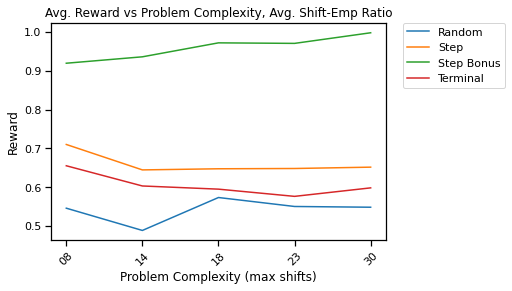

In [302]:
name = 'reward_vs_complexity_average'
title = 'Avg. Reward vs Problem Complexity, Avg. Shift-Emp Ratio'

plot = sns.lineplot(x="Problem Complexity (max shifts)", y="Reward", hue="Reward Function", data=ARvPC_data,sort=False).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

In [303]:
data = pd.read_csv("test_data/test_data.csv")
data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='above']

data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
#data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
data.drop(['model'],axis=1,inplace=True)

#data = data[data['reward_function']=='step']

data.reward_function = data.reward_function.str.title()
data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)

data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size']

conditions = [
            data['set'] == 'shifts_easy_ratio_above',
            data['set'] == 'shifts_medium_ratio_above',
            data['set'] == 'shifts_hard_ratio_above',
            data['set'] == 'shifts_extrahard_ratio_above',
            data['set'] == 'shifts_xxhard_ratio_above',
            data['set'] == 'shifts_xxxhard_ratio_above',
        ]
#outputs = [1,2,3,4,5,6,7,8]
#outputs = ['Max shifts 8, avg ratio','Max shifts 14, avg ratio', 'Max shifts 18, avg ratio', 'Max shifts 23, avg ratio', \
#           'Max shifts 8, above avg ratio', 'Max shifts 14, above avg ratio', 'Max shifts 18, above avg ratio',  'Max shifts 23, above avg ratio']
outputs = ['08',14,18,23,30,40]
X = np.select(conditions, outputs, 'Other')
data['Problem Complexity (max shifts)'] = X

chart_data2 = data.groupby(['Reward Function','Problem Complexity (max shifts)']).agg({
                                    'Reward':'mean'
                                    }).reset_index()

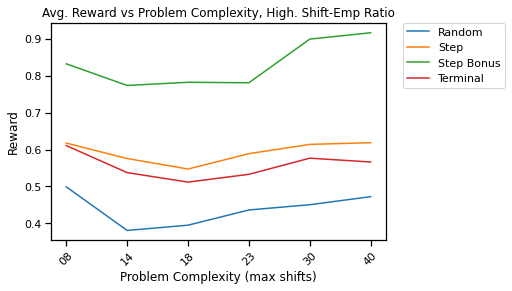

In [304]:
name = 'reward_vs_complexity_high'
title = 'Avg. Reward vs Problem Complexity, High. Shift-Emp Ratio'

plot = sns.lineplot(x="Problem Complexity (max shifts)", y="Reward", hue="Reward Function", data=chart_data2,sort=False).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

fig = plot.get_figure()
#fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

## % Acceptable 

In [60]:
# plot percentage of problems with reward == 1

In [306]:
data = pd.read_csv("test_data/test_data.csv")
data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='above']
data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
#data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
data.drop(['model'],axis=1,inplace=True)

data.reward_function = data.reward_function.str.title()
data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)

data.reward = data.reward.round(6)
data['acceptable']= [1 if i == 1 else 0 for i in data['reward']]

data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size','acceptable']

conditions = [
            data['set'] == 'shifts_easy_ratio_above',
            data['set'] == 'shifts_medium_ratio_above',
            data['set'] == 'shifts_hard_ratio_above',
            data['set'] == 'shifts_extrahard_ratio_above',
            data['set'] == 'shifts_xxhard_ratio_above',
            data['set'] == 'shifts_xxxhard_ratio_above',
        ]
#outputs = [1,2,3,4,5,6,7,8]
#outputs = ['Max shifts 8, avg ratio','Max shifts 14, avg ratio', 'Max shifts 18, avg ratio', 'Max shifts 23, avg ratio', \
#           'Max shifts 8, above avg ratio', 'Max shifts 14, above avg ratio', 'Max shifts 18, above avg ratio',  'Max shifts 23, above avg ratio']
outputs = ['08',14,18,23,30,40]
X = np.select(conditions, outputs, 'Other')
data['Problem Complexity (max shifts)'] = X

hmm = data.groupby(['Reward Function','Problem Complexity (max shifts)']).agg({
                                    'acceptable':['sum','count']
                                    }).reset_index()

hmm['% Acceptable'] = (hmm[('acceptable','sum')] / hmm[('acceptable','count')]) * 100

chart_data3 = hmm[['Reward Function','Problem Complexity (max shifts)','% Acceptable']]
chart_data3.columns = chart_data3.columns.get_level_values(0)

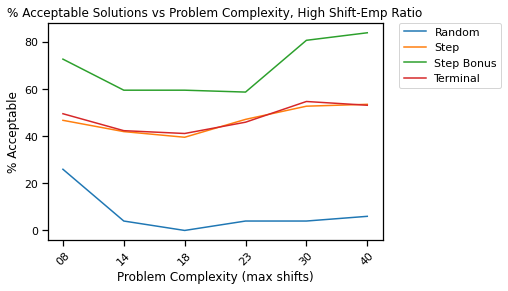

In [307]:
name = 'acceptable_vs_complexity_high'
title = '% Acceptable Solutions vs Problem Complexity, High Shift-Emp Ratio'


plot = sns.lineplot(x="Problem Complexity (max shifts)", y="% Acceptable", hue="Reward Function", data=chart_data3,sort=False).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

fig = plot.get_figure()
#fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

In [177]:
data = pd.read_csv("test_data/test_data.csv")
data['ratio'] = data['set'].apply(lambda x: x.split('_')[3])
data = data[data['ratio']=='mixed']
data[['reward_function', 'train_size']] = data['model'].str.split('_', 1, expand=True)
#data[['reward_function', 'train_size']] = data['model'].str.split('_', 0, expand=True)
data.drop(['model'],axis=1,inplace=True)

data.reward_function = data.reward_function.str.title()
data.reward_function = data.reward_function.str.replace('Stepbonus', 'Step Bonus', regex=False)

data.reward = data.reward.round(6)
data['acceptable']= [1 if i == 1 else 0 for i in data['reward']]

data.columns = ['problem','Reward','seed','set','ratio','Reward Function','train_size','acceptable']

conditions = [
            data['set'] == 'shifts_easy_ratio_mixed',
            data['set'] == 'shifts_medium_ratio_mixed',
            data['set'] == 'shifts_hard_ratio_mixed',
            data['set'] == 'shifts_extrahard_ratio_mixed',
            data['set'] == 'shifts_xxhard_ratio_mixed',
        ]
#outputs = [1,2,3,4,5,6,7,8]
#outputs = ['Max shifts 8, avg ratio','Max shifts 14, avg ratio', 'Max shifts 18, avg ratio', 'Max shifts 23, avg ratio', \
#           'Max shifts 8, above avg ratio', 'Max shifts 14, above avg ratio', 'Max shifts 18, above avg ratio',  'Max shifts 23, above avg ratio']
outputs = ['08',14,18,23,30]
X = np.select(conditions, outputs, 'Other')
data['Problem Complexity (max shifts)'] = X

hmm = data.groupby(['Reward Function','Problem Complexity (max shifts)']).agg({
                                    'acceptable':['sum','count']
                                    }).reset_index()

hmm['% Acceptable'] = (hmm[('acceptable','sum')] / hmm[('acceptable','count')]) * 100

chart_data4 = hmm[['Reward Function','Problem Complexity (max shifts)','% Acceptable']]
chart_data4.columns = chart_data4.columns.get_level_values(0)

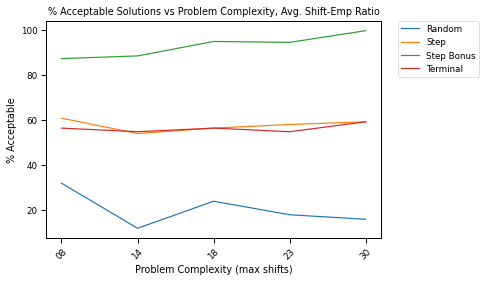

In [178]:
name = 'acceptable_vs_complexity_avg'
title = '% Acceptable Solutions vs Problem Complexity, Avg. Shift-Emp Ratio'

plot = sns.lineplot(x="Problem Complexity (max shifts)", y="% Acceptable", hue="Reward Function", data=chart_data4,sort=False).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

fig = plot.get_figure()
fig.savefig(f"{plots}{name}.png",bbox_inches='tight') 

### combine charts

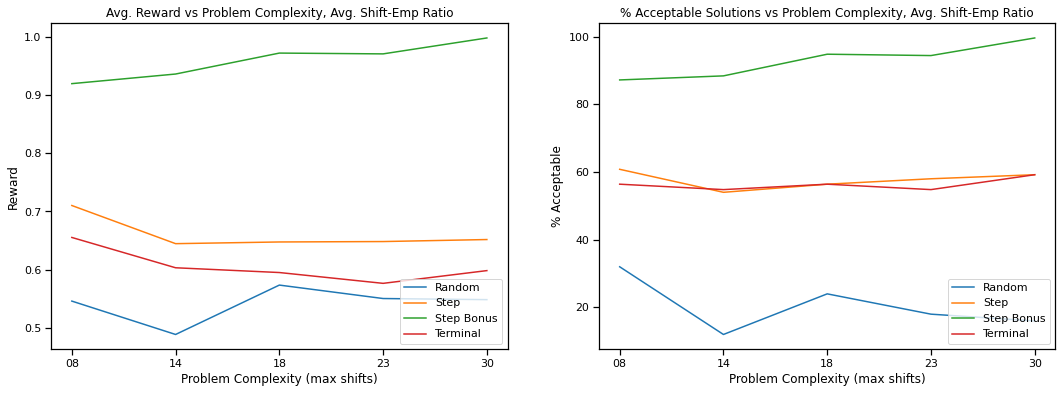

In [274]:
## Average ratio
sns.set_context("notebook")

name='combined_average_notebook'
title = 'Avg. Reward vs Problem Complexity, Avg. Shift-Emp Ratio'
title2 = '% Acceptable Solutions vs Problem Complexity, Avg. Shift-Emp Ratio'

fig, ax =plt.subplots(1,2,figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.lineplot(x="Problem Complexity (max shifts)", y="Reward", hue="Reward Function", data=ARvPC_data, ax=ax[0]).set_title(title)
sns.lineplot(x="Problem Complexity (max shifts)", y="% Acceptable", hue="Reward Function", data=chart_data4, ax=ax[1]).set_title(title2)
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
#fig.show()

fig.savefig(f"{plots}{name}.png",bbox_inches='tight')

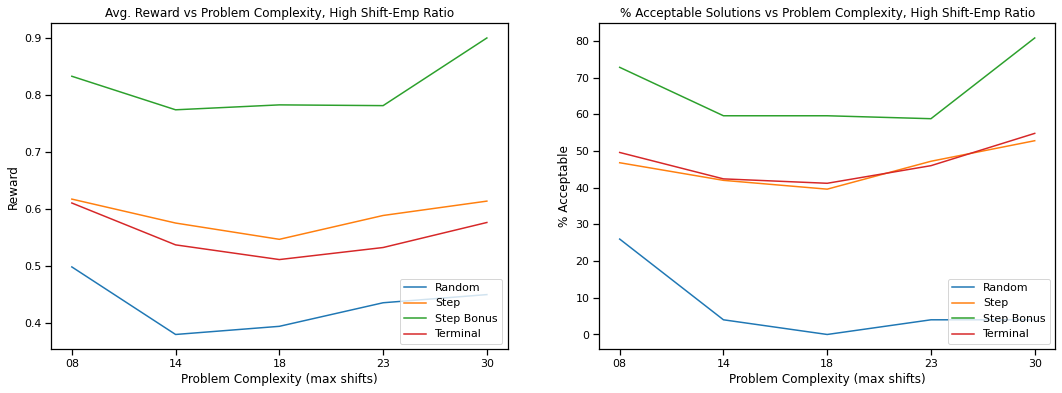

In [275]:
## High ratio

name='combined_high_notebook'
title = 'Avg. Reward vs Problem Complexity, High Shift-Emp Ratio'
title2 = '% Acceptable Solutions vs Problem Complexity, High Shift-Emp Ratio'

fig, ax =plt.subplots(1,2,figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.lineplot(x="Problem Complexity (max shifts)", y="Reward", hue="Reward Function", data=chart_data2, ax=ax[0]).set_title(title)
sns.lineplot(x="Problem Complexity (max shifts)", y="% Acceptable", hue="Reward Function", data=chart_data3, ax=ax[1]).set_title(title2)
ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')

fig.savefig(f"{plots}{name}.png",bbox_inches='tight')

## Training data: learning curve

In [161]:
training_data = glob.glob("run_data/*.csv")
print(len(training_data))
#print(training_data[10])

15


In [162]:
chart_data = pd.DataFrame(columns=['Episode','Reward Function','Reward'])

totals=[]

for i in training_data:
    td = pd.read_csv(i)
    td['Reward Function'] = i.split('_',maxsplit=6)[6].split('.')[0][2:]
    td['Episode'] = td.index + 1
    td['Reward'] = td.avg_scores#.round(2)

    td['acceptable']= [1 if i == 1 else 0 for i in td['scores'].round(6)]

    data = td[['Episode','Reward Function','Reward','acceptable']]

    data['Acceptable'] = data['acceptable'].rolling(100).mean() 
    data['Acceptable'].iloc[0:99] = data['acceptable'].iloc[100]

    chart_data = chart_data.append(data)#, ignore_index=True)
    # print(i)
    # print(len(chart_data))
    # print(f"reward: {data.Reward.sum()}")
    # totals.append(data.Reward.sum())

#chart_data

In [163]:
cd = chart_data.groupby(['Episode','Reward Function']).agg({'Reward': 'mean',
                                                            'Acceptable':['sum','count']}).reset_index()


cd['% Acceptable'] = (cd[('Acceptable','sum')] / cd[('Acceptable','count')]) * 100
cd.columns = cd.columns.get_level_values(0)
cd.drop(['Acceptable', 'Acceptable'],axis=1,inplace=True)


In [ ]:
title = 'Training: Reward per episode by Reward Function'

sns.lineplot(x="Episode", y="Reward", hue="Reward Function", data=cd).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

In [ ]:
title = 'Training: Reward per episode by Reward Function'

sns.lineplot(x="Episode", y="% Acceptable", hue="Reward Function", data=cd).set_title(title)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=45)

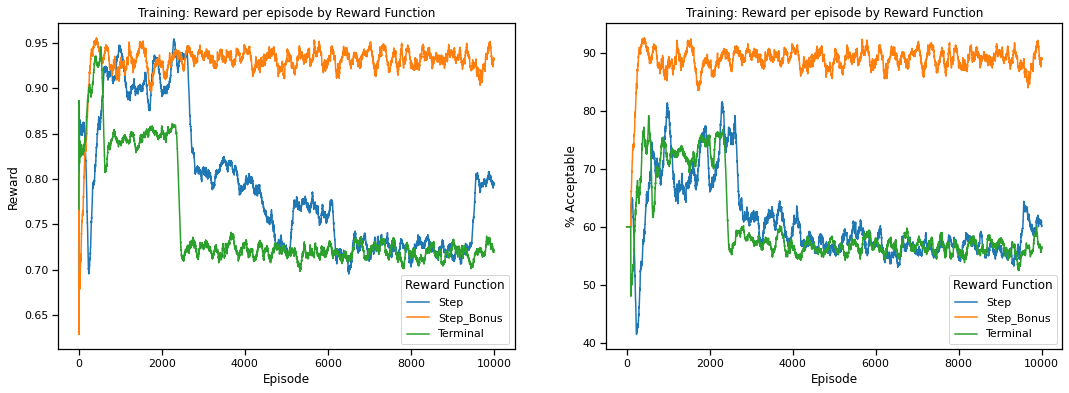

In [276]:
## training combined
name='combined_training_notebook'
title = 'Training: Reward per episode by Reward Function'
title2 = 'Training: Reward per episode by Reward Function'

fig, ax =plt.subplots(1,2,figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.lineplot(x="Episode", y="Reward", hue="Reward Function", data=cd, ax=ax[0]).set_title(title)
sns.lineplot(x="Episode", y="% Acceptable", hue="Reward Function", data=cd, ax=ax[1]).set_title(title2)
#ax[0].legend(loc='lower right')
#ax[1].legend(loc='lower right')
#fig.show()

fig.savefig(f"{plots}{name}.png",bbox_inches='tight')